> **From this notebook, we will be doing a `sentiment analysis` for COVID-19 vaccines using data from -- COVID-19 All Vaccines Tweets**

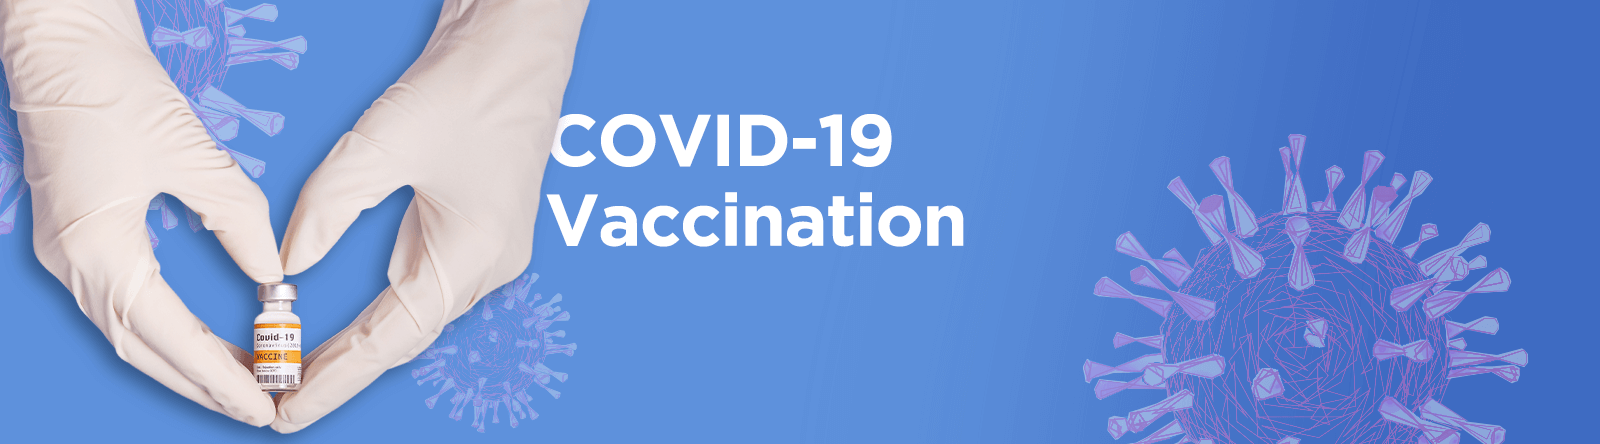


Sentiment analysis,often referred to as opinion mining, is a **`Natural Language Processing`** (NLP) technique used to determine the sentiment or emotional tone expressed in a piece of text, such as social media posts(Twiiter), news articles, or reviews. 

In the context of the COVID-19 pandemic, sentiment analysis plays a crucial role in understanding and monitoring public opinion, emotions, and attitudes towards various aspects of the pandemic.

Sentiment analysis typically classifies text into categories like **`positive, negative, or neutral.`** However, for COVID-19 sentiment analysis, a more nuanced approach may be required, distinguishing between sentiments like fear, anger, hope, trust, and confusion.

## Data Preparation

> **Loading Packages**

 
- We will be importing necessary libraries for our analysis

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

> We will be importing the dataset from the COVID-19 All Vaccine Tweets

In [3]:
covid_df = pd.read_csv(r"C:\Data\Twitter_analysis\vaccination_all_tweets.csv")

In [4]:
covid_df.head(3)

id    user_name              user_location  \
0  1340539111971516416   Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433  Albert Fong          San Francisco, CA   
2  1337858199140118533     eli🇱🇹🇪🇺👌                   Your Bed   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False

> **Now that we have imported the dataset, we will check the shape of our dataset, to view the number of rows and column.**

In [5]:
print('\t\t"DataFrame Summary"',end='\n\n')
print(covid_df.info())

		"DataFrame Summary"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int

In [6]:
covid_df.shape
covid_df.describe()

(228207, 16)

id  user_followers   user_friends  user_favourites  \
count  2.282070e+05    2.282070e+05  228207.000000     2.282070e+05   
mean   1.407541e+18    9.605393e+04     986.736204     1.210417e+04   
std    2.908485e+16    8.389053e+05    5293.500468     3.908233e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.381940e+18    5.500000e+01      27.000000     5.700000e+01   
50%    1.408133e+18    3.280000e+02     229.000000     9.960000e+02   
75%    1.428688e+18    1.521000e+03     794.000000     7.300000e+03   
max    1.463251e+18    1.635305e+07  582461.000000     1.299600e+06   

            retweets      favorites  
count  228207.000000  228207.000000  
mean        2.489284      10.819020  
std        51.079821     199.527693  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       2.000000  
max     12294.000000   54017.000000

> **Finding Missing Values**

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    return(np.transpose(missing_values))

In [10]:
missing_data(covid_df)

id user_name user_location user_description user_created  \
Total        0         2         66911            17018            0   
Percent    0.0  0.000876      29.32031         7.457265          0.0   
Types    int64    object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent            0.0          0.0             0.0           0.0     0.0   
Types            int64        int64           int64          bool  object   

           text   hashtags    source retweets favorites is_retweet  
Total         0      49703       119        0         0          0  
Percent     0.0  21.779788  0.052146      0.0       0.0        0.0  
Types    object     object    object    int64     int64       bool

In [11]:
covid_df.isna().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

## Unique Values

> **Finding Unique Values**

In [12]:
def unique_values(data):
    total = data.count()
    values = pd.DataFrame(total)
    values.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    values['Uniques'] = uniques
    return(np.transpose(values))

In [14]:
unique_values(covid_df)

id  user_name  user_location  user_description  user_created  \
Total    228207     228205         161296            211189        228207   
Uniques  228207      85549          25458             84003         86739   

         user_followers  user_friends  user_favourites  user_verified    date  \
Total            228207        228207           228207         228207  228207   
Uniques           22439          8196            38744              2  222093   

           text  hashtags  source  retweets  favorites  is_retweet  
Total    228207    178504  228088    228207     228207      228207  
Uniques  226373     60221     379       451        986           1

## Frequent Values

> **Finding Frequent Values**

In [15]:
def most_frequent_values(data):
    total = data.count()
    values = pd.DataFrame(total)
    values.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    values['Most frequent item'] = items
    values['Frequence'] = vals
    values['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(values))

In [16]:
most_frequent_values(covid_df)

id          user_name     user_location  \
Total                            228207             228205            161296   
Most frequent item  1340539111971516416  CoWIN Blore 18-44  Bengaluru, India   
Frequence                             1              12210             19651   
Percent from total                  0.0               5.35            12.183   

                                                     user_description  \
Total                                                          211189   
Most frequent item  Get instant alerts for Free/Paid slots in BBMP...   
Frequence                                                       12185   
Percent from total                                               5.77   

                           user_created user_followers user_friends  \
Total                            228207         228207       228207   
Most frequent item  2021-06-29 09:33:13             24            0   
Frequence                         12210           3703        29711   
Percent from total                 5.35          1.623       13.019   

                   user_favourites user_verified                 date  \
Total                       228207        228207               228207   
Most frequent item               0         False  2021-06-30 04:30:00   
Frequence                    12062        209005                    6   
Percent from total           5.286        91.586                0.003   

                                                                 text  \
Total                                                          228207   
Most frequent item  #COVAXIN vaccine approved for children aged 2 ...   
Frequence                                                          18   
Percent from total                                              0.008   

                               hashtags               source retweets  \
Total                            178504               228088   228207   
Most frequent item  ['COVAXIN', 'BBMP']  Twitter for Android        0   
Frequence                         11113                58722   170505   
Percent from total                6.226               25.745   74.715   

                   favorites is_retweet  
Total                 228207     228207  
Most frequent item         0      False  
Frequence             118197     228207  
Percent from total    51.794      100.0

# Data Pre-Processing

 ## Duplicates Check

In [17]:
covid_df.duplicated().value_counts()

False    228207
dtype: int64

 > No Duplicates Found

In [18]:
covid_df.text.duplicated().value_counts()

False    226373
True       1834
Name: text, dtype: int64

In [19]:
covid_df = covid_df.drop_duplicates('text')
covid_df.shape

(226373, 16)

# Data Visualization

In [20]:
covid_df.user_location.value_counts().nlargest(20)

Bengaluru, India                  19650
India                              8272
New Delhi, India                   3073
Toronto, Canada  and Worldwide     2653
United States                      2039
Mumbai, India                      1946
New Delhi                          1224
Sri Lanka                          1107
Beijing, China                     1040
Mumbai                             1023
Los Angeles, CA                     966
Toronto, Ontario                    951
London                              950
Canada                              947
London, England                     926
Hyderabad, India                    857
California, USA                     756
Chennai, India                      744
Beijing                             675
Malaysia                            673
Name: user_location, dtype: int64

In [21]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

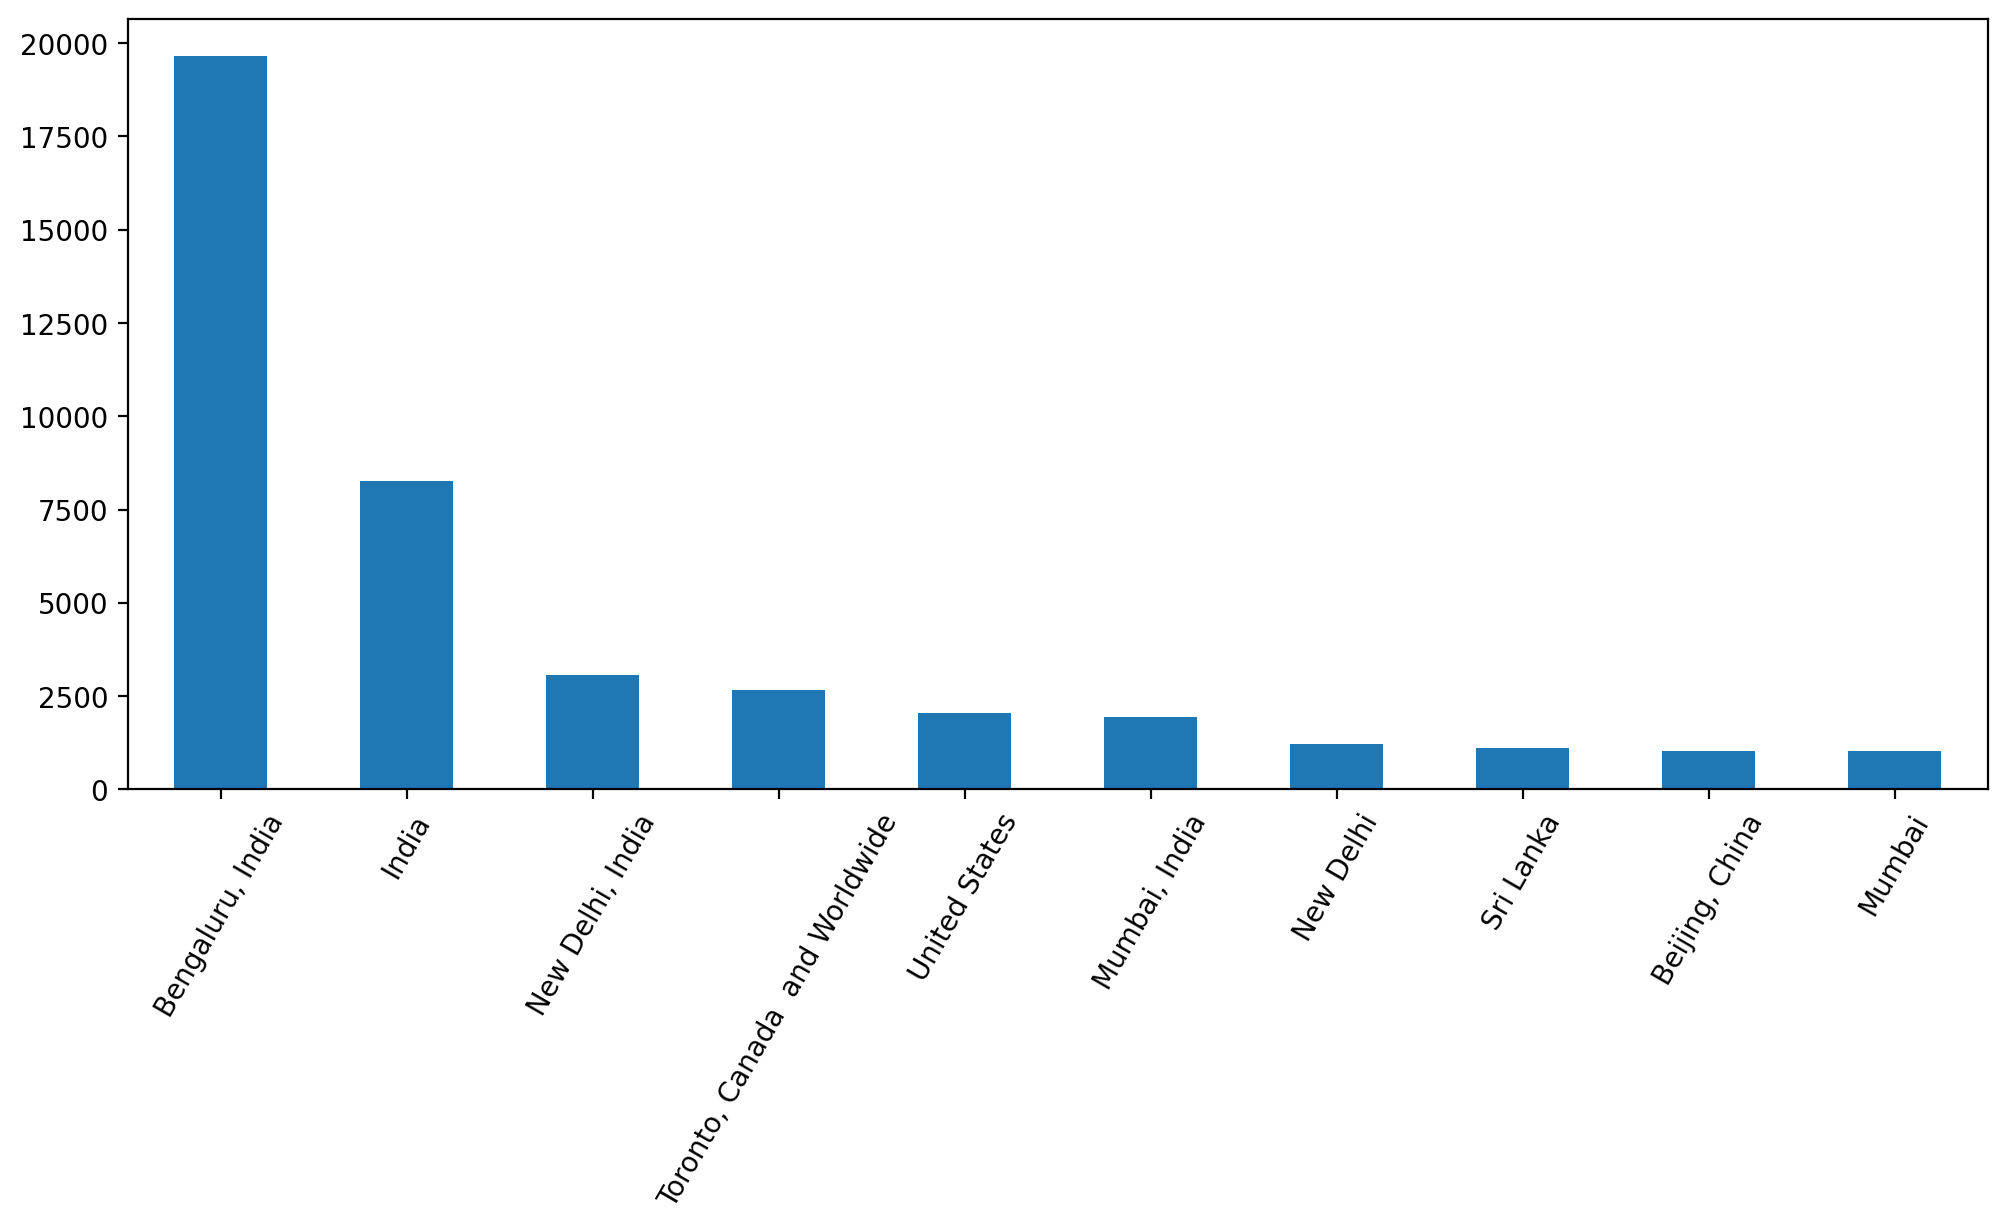

In [24]:
plt.figure(figsize=(12,5))
covid_df.user_location.value_counts().nlargest(10).plot(kind='bar');
plt.xticks(rotation=60);

> **Most of the tweets from India,USA and Others**

In [25]:
covid_df.hashtags.value_counts().nunique()
covid_df.hashtags.value_counts().nlargest(20)

166

['COVAXIN']                                             10594
['Moderna']                                             10579
['Covaxin']                                              9710
['COVAXIN', 'BBMP']                                      9694
['SputnikV']                                             5492
['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']      2922
['Sinopharm']                                            2727
['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']     2690
['Sinovac']                                              2447
['moderna']                                              2382
['covaxin']                                              2296
['COVID19']                                              1682
['Pfizer', 'Moderna']                                    1308
['COVAXIN', 'GurgaonCOVAXIN']                            1166
['PfizerBioNTech']                                       1154
['COVAXIN', 'PuneCOVAXIN']                               1026
['RURAL'

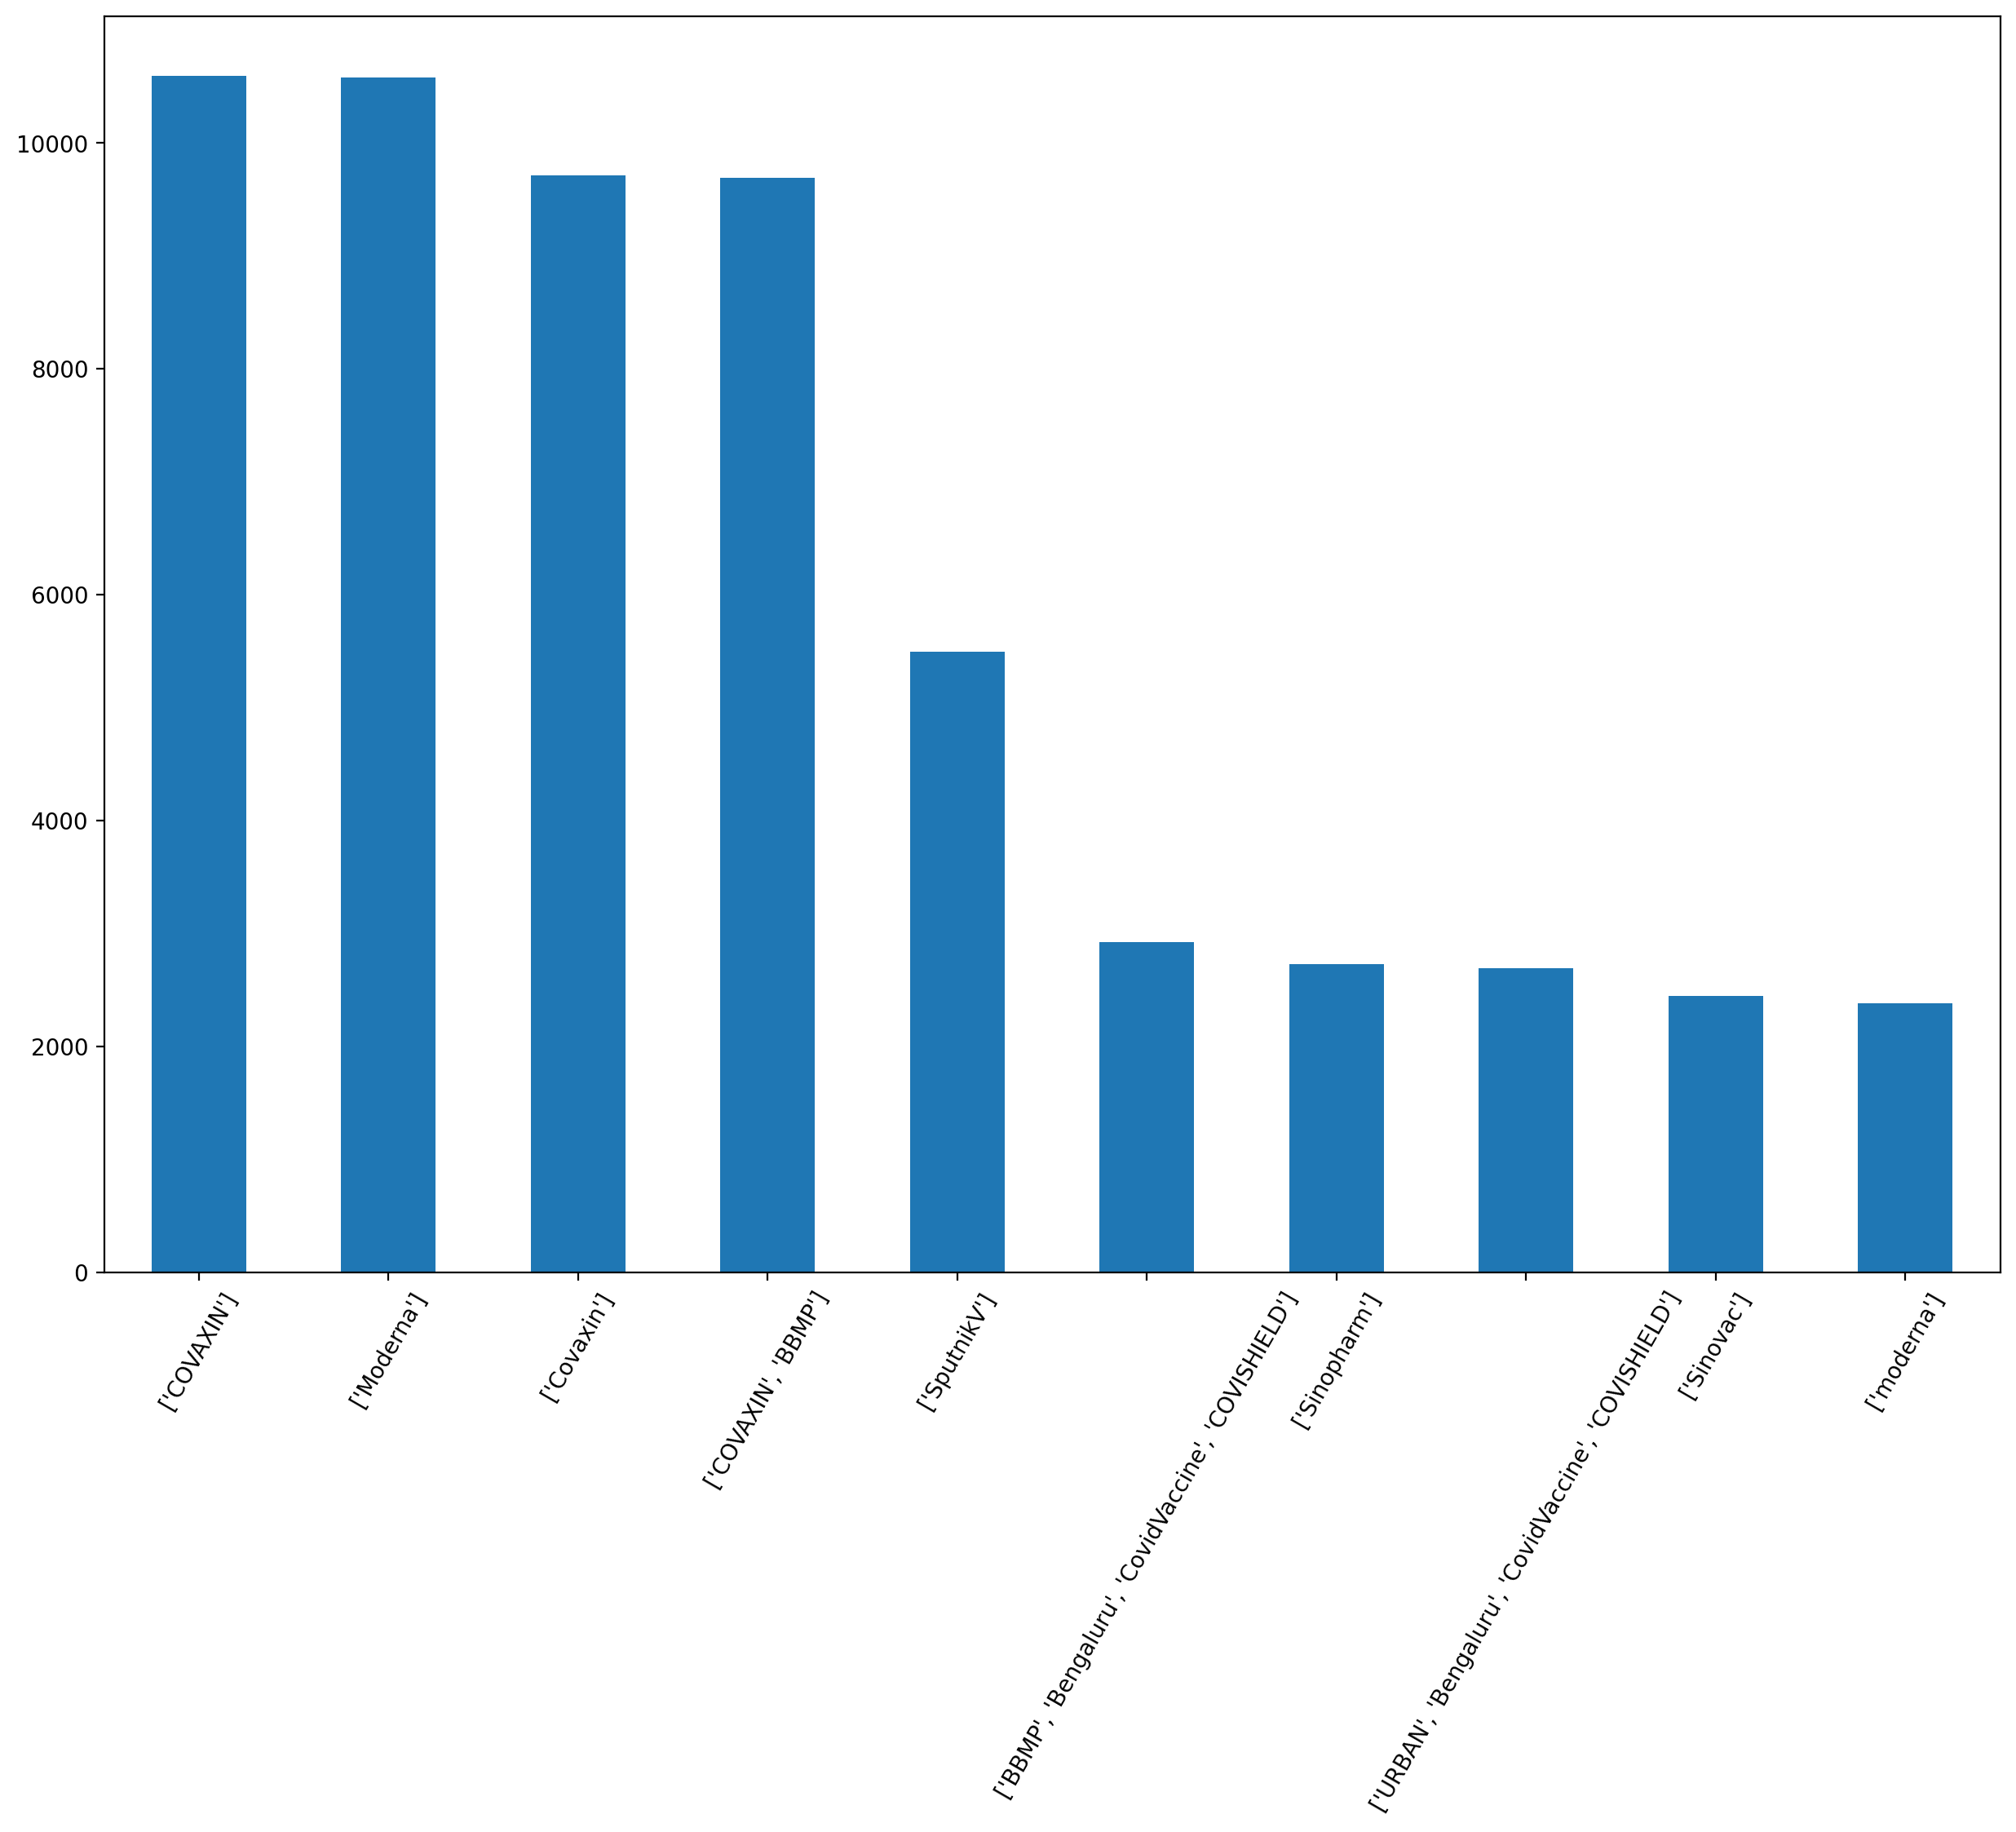

In [26]:
plt.figure(figsize=(15,10))
covid_df.hashtags.value_counts().nlargest(10).plot(kind='bar');
plt.xticks(rotation=60);

> **COVAXIN is most used Hashtag in all Tweets**

In [27]:
covid_df.source.value_counts().nunique()
covid_df.source.value_counts().nlargest(20)

77

Twitter for Android               58553
Twitter Web App                   57050
Twitter for iPhone                49396
CowinAlertsBot                    11276
cowin_vaccine_app                 10203
Cowin Vaccination Availability     8525
TweetDeck                          7306
VaxBlr                             6619
Twitter for iPad                   3071
Instagram                          2235
Hootsuite Inc.                     1809
Buffer                              945
CowinAlertBot                       879
Twitter Media Studio                653
Revive Social App                   546
IFTTT                               470
Hocalwire Social Share              385
histeriusapp                        368
Twitter Media Studio - LiveCut      340
WordPress.com                       337
Name: source, dtype: int64

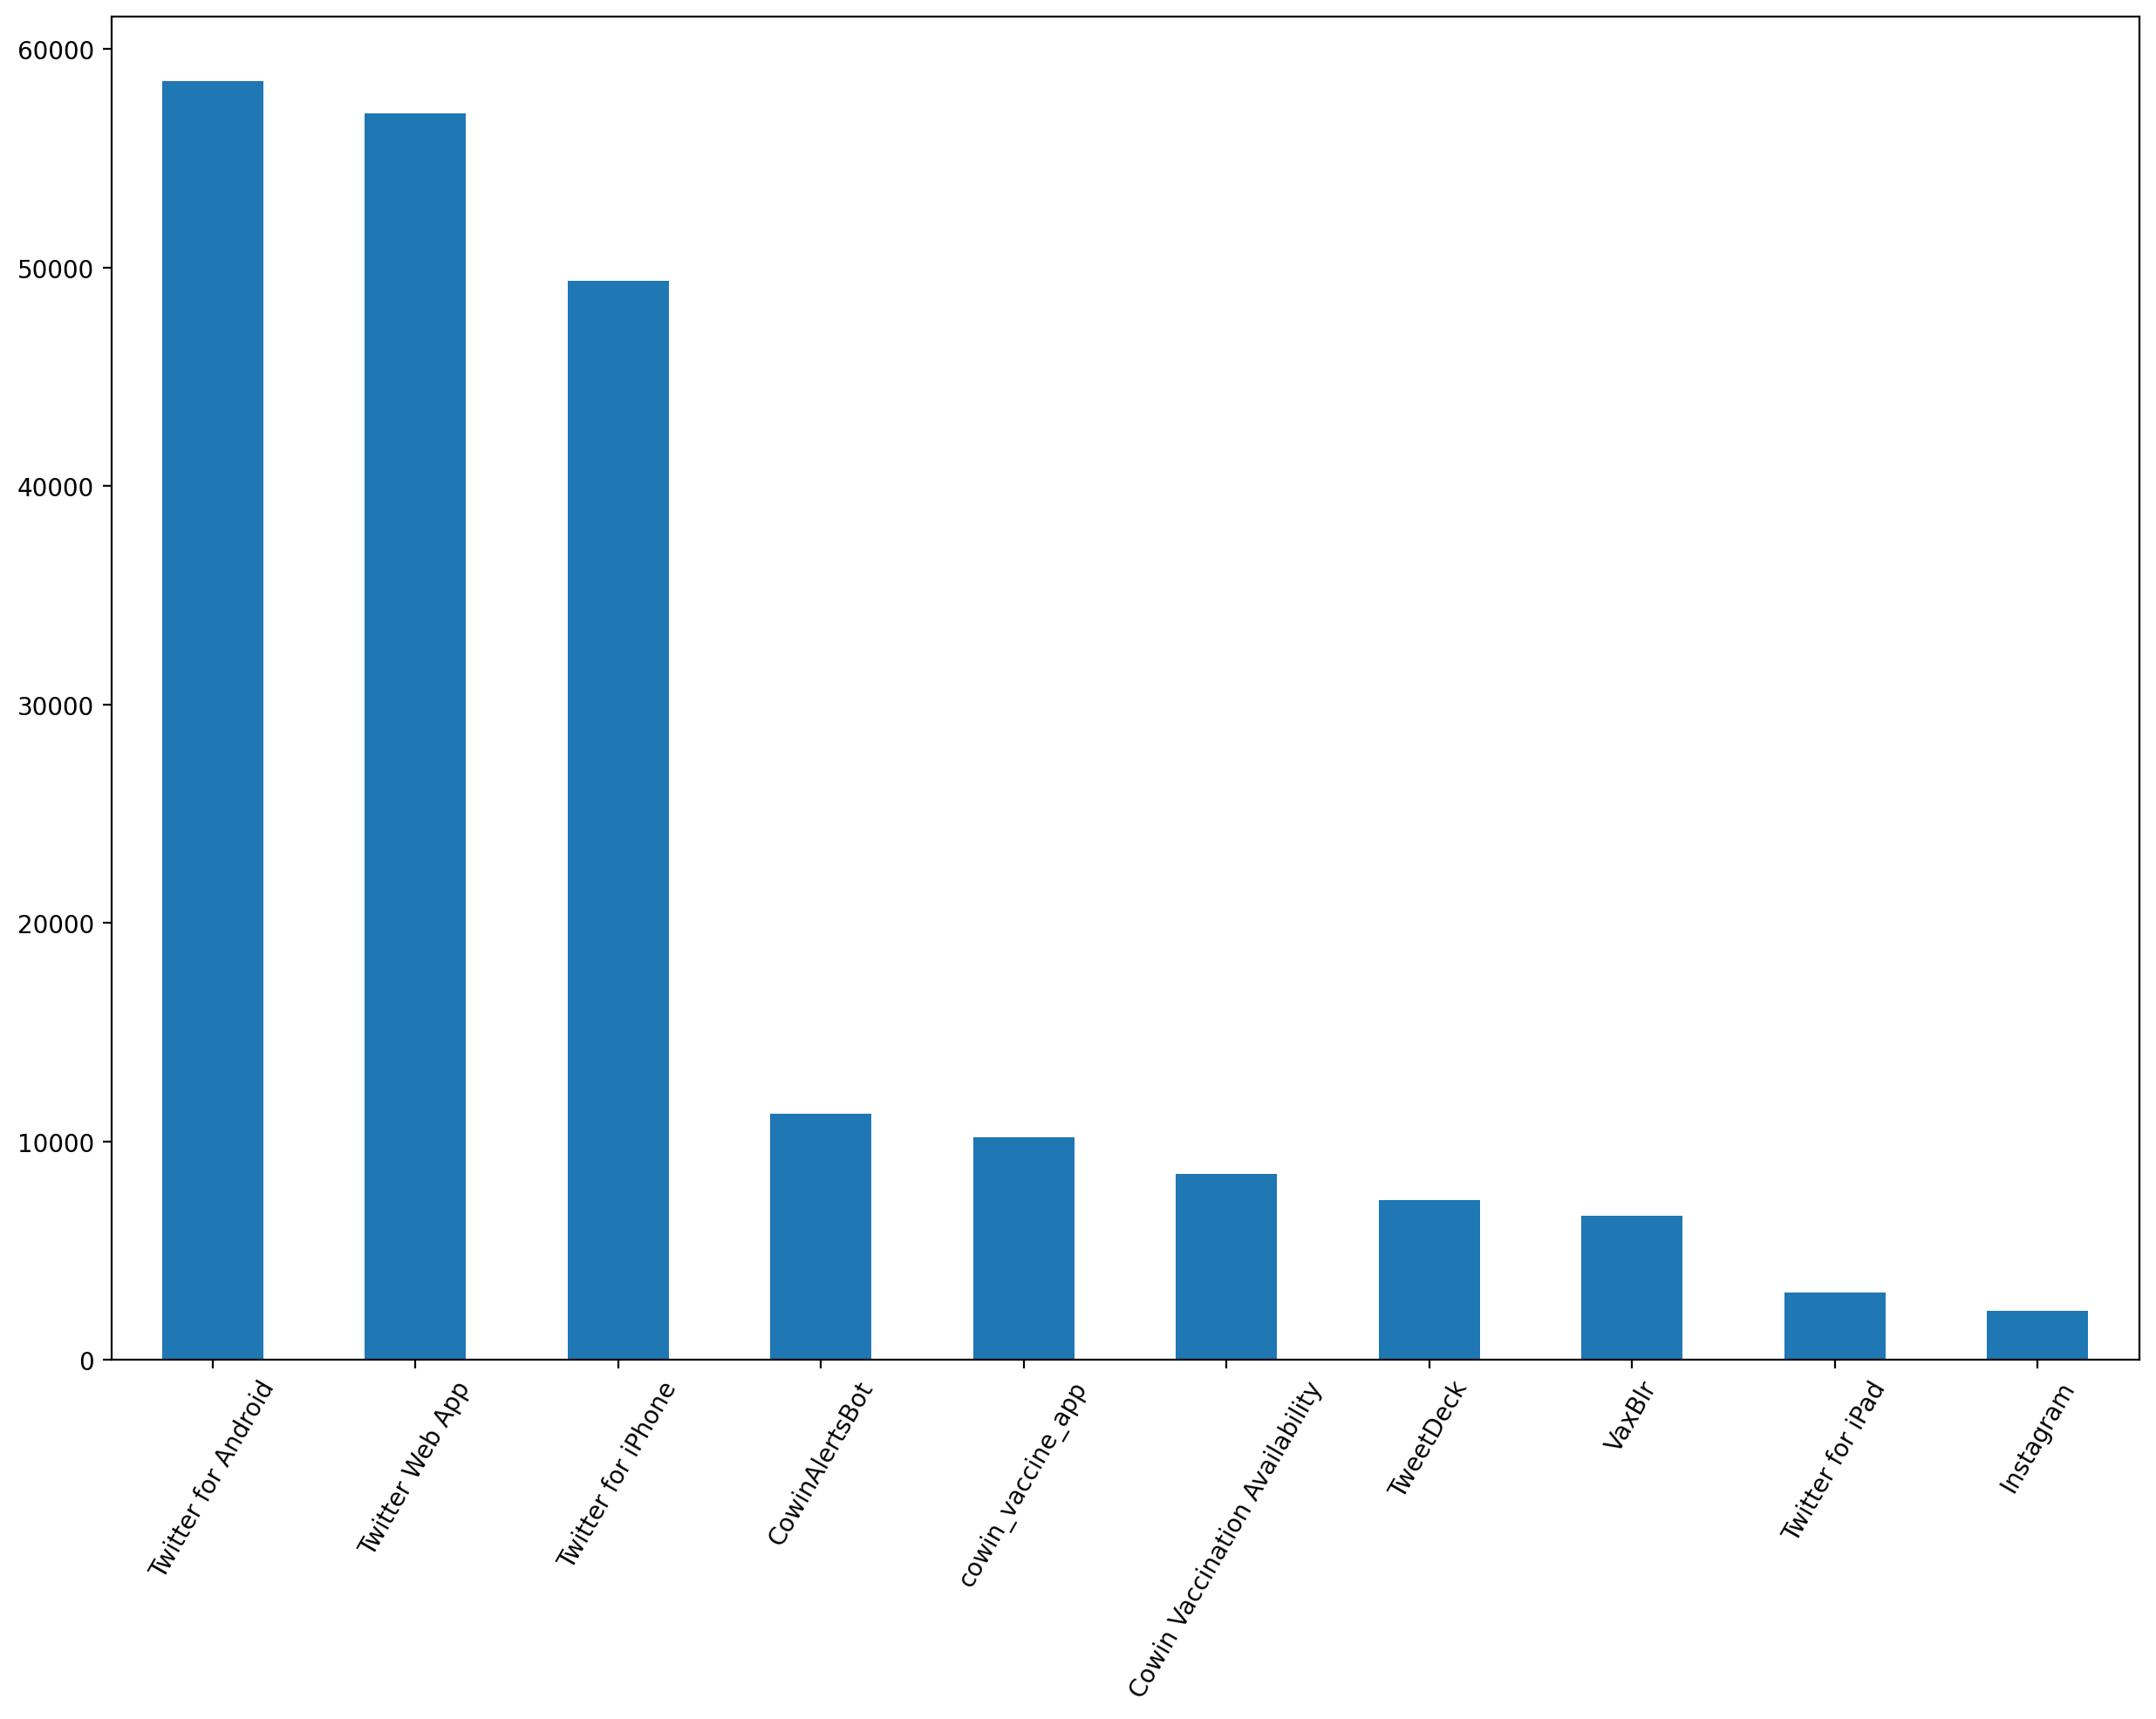

In [28]:
plt.figure(figsize=(15,10))
covid_df.source.value_counts().nlargest(10).plot(kind='bar');
plt.xticks(rotation=60);

# Corrupted Data

In [29]:
covid_df[['date']][1:5]

date
1  2020-12-13 16:27:13
2  2020-12-12 20:33:45
3  2020-12-12 20:23:59
4  2020-12-12 20:17:19

In [30]:
covid_df['date'] = pd.to_datetime(covid_df['date']).dt.date

In [31]:
covid_df[['date']][1:5]

date
1  2020-12-13
2  2020-12-12
3  2020-12-12
4  2020-12-12

In [32]:
covid_df.sort_values(by='date', ascending=True).head(2)

id    user_name    user_location  \
294  1337884374927368201     Nacindex              NaN   
34   1337742528108519424  Rajat Kotra  London, England   

                                      user_description         user_created  \
294  Tweet and RT all things #OpenFinance #bitcoin ...  2019-03-16 15:14:32   
34   Ever-curious polymath,#global leader#startups#...  2009-12-03 12:03:28   

     user_followers  user_friends  user_favourites  user_verified        date  \
294             331           431             1132          False  2020-12-12   
34              754           917              220          False  2020-12-12   

                                                  text  \
294  https://t.co/Z3j0NbDUbq\nUS agency authorizes ...   
34   Vaccine!! Anyone?? #covid #Pfizervaccine #Pfiz...   

                                         hashtags               source  \
294                                           NaN      Twitter Web App   
34   ['covid', 'Pfizervaccine', 'PfizerBioNTech']  Twitter for Android   

     retweets  favorites  is_retweet  
294         1          0       False  
34          0          0       False

In [33]:
covid_df.date.sort_values(ascending=True).head(1) # Starting date

294    2020-12-12
Name: date, dtype: object

In [34]:
covid_df.date.sort_values(ascending=False).head(1) # Last date

223366    2021-11-23
Name: date, dtype: object

# Removing Unnecessary columns

In [35]:
data = ['user_location', 'date', 'text']

covid_df = covid_df[data]
pd.set_option('display.max_colwidth', 100)

covid_df.head()

user_location        date  \
0  La Crescenta-Montrose, CA  2020-12-20   
1          San Francisco, CA  2020-12-13   
2                   Your Bed  2020-12-12   
3     Vancouver, BC - Canada  2020-12-12   
4                        NaN  2020-12-12   

                                                                                                  text  
0    Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...  
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is create...  
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. ...  
4  Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #...

In [36]:
covid_df.shape

(226373, 3)

In [37]:
covid_df.isna().sum()

user_location    65337
date                 0
text                 0
dtype: int64

In [38]:
covid_df = covid_df.fillna("Not Mentioned")

In [39]:
covid_df.isna().sum()

user_location    0
date             0
text             0
dtype: int64

In [40]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_location  226373 non-null  object
 1   date           226373 non-null  object
 2   text           226373 non-null  object
dtypes: object(3)
memory usage: 6.9+ MB


In [43]:
covid_df

user_location        date  \
0       La Crescenta-Montrose, CA  2020-12-20   
1               San Francisco, CA  2020-12-13   
2                        Your Bed  2020-12-12   
3          Vancouver, BC - Canada  2020-12-12   
4                   Not Mentioned  2020-12-12   
...                           ...         ...   
228202           Bengaluru, India  2021-11-15   
228203           Bengaluru, India  2021-11-15   
228204           Bengaluru, India  2021-11-15   
228205          Southern  Africa   2021-11-15   
228206           Bengaluru, India  2021-11-15   

                                                                                                       text  
0         Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1       While the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...  
2       #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is create...  
3       Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. ...  
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #...  
...                                                                                                     ...  
228202  45+ #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 02:30PM\nFREE Slots 0\nPAID Slots ...  
228203  18-44 #BBMP #Bengaluru #CovidVaccine Availability for 15/11 at 02:00PM\nFREE Slots \n#COVISHIELD...  
228204  18-44 #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 02:00PM\nFREE Slots 0\nPAID Slot...  
228205  They promote their Vaccines leaving out the stronger @Russia vaccine \n#SputnikV https://t.co/nD...  
228206  45+ #URBAN #Bengaluru #CovidVaccine Availability for 15/11 at 01:30PM\nFREE Slots 0\nPAID Slots ...  

[226373 rows x 3 columns]

In [55]:
import re
import string
from bs4 import BeautifulSoup

## Text Preprocessing

> **Lower Case**

In [51]:
covid_df['text'] = covid_df['text'].str.lower()
covid_df['text']

0           same folks said daikon paste could treat a cytokine storm #pfizerbiontech https://t.co/xehhimg1kf
1         while the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...
2         #coronavirus #sputnikv #astrazeneca #pfizerbiontech #moderna #covid_19 russian vaccine is create...
3         facts are immutable, senator, even when you're not ethically sturdy enough to acknowledge them. ...
4         explain to me again why we need a vaccine @borisjohnson @matthancock #whereareallthesickpeople #...
                                                         ...                                                 
228202    45+ #urban #bengaluru #covidvaccine availability for 15/11 at 02:30pm\nfree slots 0\npaid slots ...
228203    18-44 #bbmp #bengaluru #covidvaccine availability for 15/11 at 02:00pm\nfree slots \n#covishield...
228204    18-44 #urban #bengaluru #covidvaccine availability for 15/11 at 02:00pm\nfree slots 0\npaid slot...
228205    

> **URL Removal**

In [ ]:
covid_df['text'] = covid_df['text'].apply(lambda x:re.sub(r"http\S+", "", x))
covid_df["text"]

> **Punctuation Removal**

In [56]:
punctuation_removal = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation_removal))

covid_df["text"] = covid_df["text"].apply(lambda text: remove_punctuation(text))

covid_df["text"]

0                                   same folks said daikon paste could treat a cytokine storm pfizerbiontech 
1         while the world has been on the wrong side of history this year hopefully the biggest vaccinatio...
2         coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to la...
3         facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 yo...
4         explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfiz...
                                                         ...                                                 
228202    45 urban bengaluru covidvaccine availability for 1511 at 0230pm\nfree slots 0\npaid slots \ncovi...
228203    1844 bbmp bengaluru covidvaccine availability for 1511 at 0200pm\nfree slots \ncovishield  dose1...
228204    1844 urban bengaluru covidvaccine availability for 1511 at 0200pm\nfree slots 0\npaid slots \nco...
228205    

> **Single character and double space removal**

In [57]:
covid_df["text"] = covid_df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
covid_df["text"] = covid_df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

covid_df["text"]

0                                      same folks said daikon paste could treatcytokine storm pfizerbiontech 
1         while the world has been on the wrong side of history this year hopefully the biggest vaccinatio...
2         coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to la...
3         facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 yo...
4         explain to me again why we needvaccine borisjohnson matthancock whereareallthesickpeople pfizerb...
                                                         ...                                                 
228202    45 urban bengaluru covidvaccine availability for 1511 at 0230pm free slots 0 paid slots covishie...
228203    1844 bbmp bengaluru covidvaccine availability for 1511 at 0200pm free slots covishield dose11676...
228204    1844 urban bengaluru covidvaccine availability for 1511 at 0200pm free slots 0 paid slots covish...
228205    

> **Emoji Removal**

In [58]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

covid_df["text"] = covid_df["text"].apply(str)
covid_df["text"] = covid_df["text"].apply(remove_emoji)
covid_df["text"]

0                                      same folks said daikon paste could treatcytokine storm pfizerbiontech 
1         while the world has been on the wrong side of history this year hopefully the biggest vaccinatio...
2         coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine is created to la...
3         facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 yo...
4         explain to me again why we needvaccine borisjohnson matthancock whereareallthesickpeople pfizerb...
                                                         ...                                                 
228202    45 urban bengaluru covidvaccine availability for 1511 at 0230pm free slots 0 paid slots covishie...
228203    1844 bbmp bengaluru covidvaccine availability for 1511 at 0200pm free slots covishield dose11676...
228204    1844 urban bengaluru covidvaccine availability for 1511 at 0200pm free slots 0 paid slots covish...
228205    

 > **Stop Words**

In [59]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [60]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

covid_df["text"] = covid_df["text"].apply(lambda text: remove_stopwords(text))
covid_df["text"]

0                                            folks said daikon paste could treatcytokine storm pfizerbiontech
1                                 world wrong side history year hopefully biggest vaccination effort weve ev…
2         coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 ...
3                            facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…
4                       explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…
                                                         ...                                                 
228202     45 urban bengaluru covidvaccine availability 1511 0230pm free slots 0 paid slots covishield dose1…
228203       1844 bbmp bengaluru covidvaccine availability 1511 0200pm free slots covishield dose11676 dose2…
228204    1844 urban bengaluru covidvaccine availability 1511 0200pm free slots 0 paid slots covishield dose…
228205    

In [66]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Lemmatization

- Lemmatization is a natural language processing (NLP) technique used to reduce words to their base or root form, known as the lemma. 
- Unlike stemming, which involves removing prefixes or suffixes to find the root word (sometimes resulting in non-existent words), lemmatization considers the word's context and morphology to return a valid word that makes sense in a given language.
- The lemma is the base form of a word. For example, the lemma of the word "running" is "run," and the lemma of "better" is "good." Lemmatization ensures that the resulting word is valid and found in the language's dictionary.

In [ ]:
lemmatizer = WordNetLemmatizer()

In [68]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [97]:
from tqdm import tqdm, tqdm_notebook 
# tqdm (taqadum) means progress and it is used to create a smart progress bar for the loops. 
tqdm.pandas()

In [ ]:
lemma_df = covid_df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

In [69]:
lemma_df = covid_df['text'].apply(lambda x: preprocess(x, 'lemma'))

lemma_df.head()

0  \
0                                  folk said daikon paste could treatcytokine storm pfizerbiontech   
1                       world wrong side history year hopefully biggest vaccination effort weve ev   
2  coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year   
3                       fact immutable senator even youre ethically sturdy enough acknowledge born   
4             explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech   

    1  
0   8  
1  11  
2  11  
3  10  
4   6

In [70]:
lemma_df.columns = ['clean_text_lemma', 'text_length_lemma']

In [71]:
covid_df = pd.concat([covid_df, lemma_df], axis=1)

covid_df.head(2)

user_location        date  \
0  La Crescenta-Montrose, CA  2020-12-20   
1          San Francisco, CA  2020-12-13   

                                                                          text  \
0             folks said daikon paste could treatcytokine storm pfizerbiontech   
1  world wrong side history year hopefully biggest vaccination effort weve ev…   

                                                             clean_text_lemma  \
0             folk said daikon paste could treatcytokine storm pfizerbiontech   
1  world wrong side history year hopefully biggest vaccination effort weve ev   

   text_length_lemma  
0                  8  
1                 11

> **To count the frequency of words in a dataset specifically within the Particularly column. It performs the word counting and then displays the ten most common words in the text data.**

In [72]:
from collections import Counter
count = Counter()
for text in covid_df["text"].values:
    for word in text.split():
        count[word] += 1
        
count.most_common(10)

[('covaxin', 71886),
 ('vaccine', 51340),
 ('moderna', 46958),
 ('slots', 34004),
 ('dose', 30603),
 ('covid19', 29736),
 ('age', 23928),
 ('18', 20943),
 ('pfizer', 14350),
 ('vaccines', 14003)]

In [73]:
counting = Counter()
for text in covid_df["clean_text_lemma"].values:
    for word in text.split():
        counting[word] += 1
        
counting.most_common(10)

[('covaxin', 74502),
 ('vaccine', 70936),
 ('dose', 50114),
 ('moderna', 49210),
 ('covid', 47815),
 ('slot', 34553),
 ('age', 33060),
 ('pfizer', 15294),
 ('sputnikv', 14354),
 ('vaccinated', 13586)]

In [74]:
#Number of Words
covid_df['Number_Of_Words'] = covid_df['text'].apply(lambda x:len(x.split(' ')))

In [77]:
covid_df.sample(5)

user_location        date  \
11939        Not Mentioned  2021-03-01   
37847    Köln, Deutschland  2021-03-25   
186147  Bhubaneswar, India  2021-09-13   
39158           Irvine, CA  2021-03-26   
87950    Naccache, Lebanon  2021-05-31   

                                                                                                   text  \
11939                       virat kohli dance compilation must watch viratkohli ashwin indvend ipl2021…   
37847                                   covid19 impfstoff update kinder im impfstofftest pfizerbiontech   
186147                                                           approval covaxin expected week covaxin   
39158   covidvaccine side effect big red itchy rash develop 78 days moderna vaccinated anyone get this…   
87950                           hoballah sputnikv vaccine production contract signed next month lebanon   

                                                                             clean_text_lemma  \
11939                  virat kohli dance compilation must watch viratkohli ashwin indvend ipl   
37847                           covid impfstoff update kinder im impfstofftest pfizerbiontech   
186147                                                 approval covaxin expected week covaxin   
39158   covidvaccine side effect big red itchy rash develop day moderna vaccinated anyone get   
87950                 hoballah sputnikv vaccine production contract signed next month lebanon   

        text_length_lemma  Number_Of_Words  
11939                  10               10  
37847                   7                7  
186147                  5                5  
39158                  13               15  
87950                   9                9

In [78]:
# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

covid_df['tokenized'] = covid_df['text'].apply(lambda x: tokenization(x.lower()))

In [79]:
covid_df.sample(5)

user_location        date  \
40874         England  2021-03-30   
172171          space  2021-08-26   
100378          India  2021-06-08   
128441  Not Mentioned  2021-07-11   
61669       New Delhi  2021-04-17   

                                                                                                   text  \
40874                          got oxford vaccineand got sticker doesn’t hurt seconds get vaccinated i…   
172171                                                 pajhwok sinopharm panjshirvalley type assistance   
100378                    coming affordabilitytrust mewe lesser cost water bottleswe lowest world home…   
128441  jacintaarnold1 scottyfrommarketing cannot take credit auspol coronavirusaustralia deltavariant…   
61669         second batch sinovac covid19 vaccine cambodia purchased china arrived phnom penh capital…   

                                                                                     clean_text_lemma  \
40874                                    got oxford vaccineand got sticker hurt second get vaccinated   
172171                                               pajhwok sinopharm panjshirvalley type assistance   
100378                   coming affordabilitytrust mewe lesser cost water bottleswe lowest world home   
128441  jacintaarnold scottyfrommarketing cannot take credit auspol coronavirusaustralia deltavariant   
61669          second batch sinovac covid vaccine cambodia purchased china arrived phnom penh capital   

        text_length_lemma  Number_Of_Words  \
40874                   9               11   
172171                  5                5   
100378                 10               10   
128441                  8                8   
61669                  12               12   

                                                                                                  tokenized  
40874                [got, oxford, vaccineand, got, sticker, doesn, t, hurt, seconds, get, vaccinated, i, ]  
172171                                               [pajhwok, sinopharm, panjshirvalley, type, assistance]  
100378            [coming, affordabilitytrust, mewe, lesser, cost, water, bottleswe, lowest, world, home, ]  
128441  [jacintaarnold1, scottyfrommarketing, cannot, take, credit, auspol, coronavirusaustralia, deltav...  
61669   [second, batch, sinovac, covid19, vaccine, cambodia, purchased, china, arrived, phnom, penh, cap...

In [81]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [82]:
from wordcloud import WordCloud, STOPWORDS

# Word Cloud

(-0.5, 399.5, 199.5, -0.5)

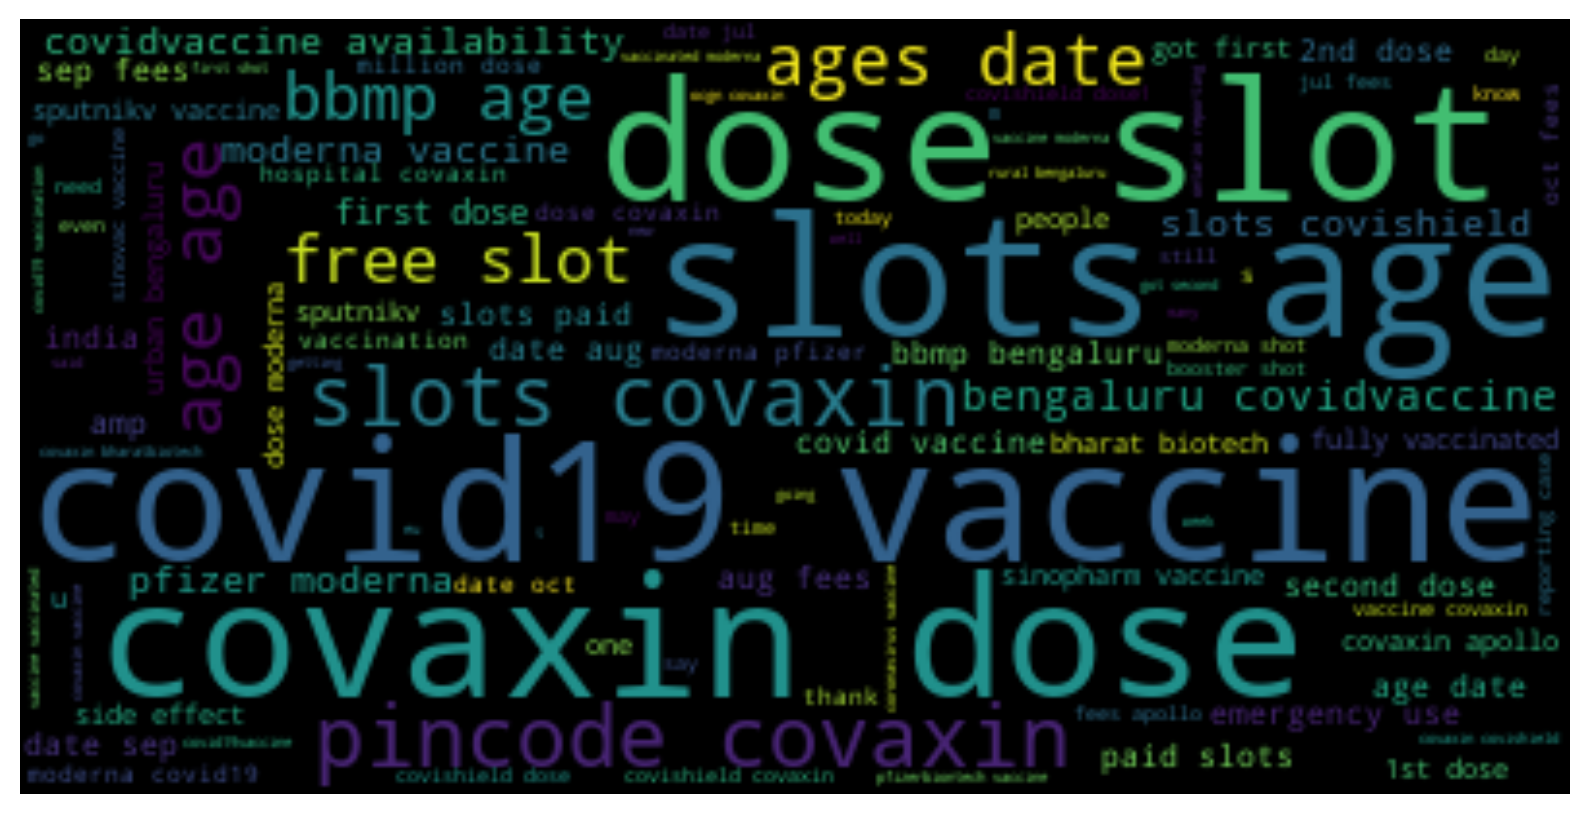

In [88]:

All_tweets = " ".join(review for review in covid_df["text"])

fig, word = plt.subplots(1, 1, figsize  = (10,10))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(All_tweets)

# Display the generated image:
word.imshow(wordcloud_ALL, interpolation='bilinear')

word.axis('off')

> **Most common words in whole tweets**

In [89]:
india_df = covid_df.loc[covid_df.user_location=="India"]

(-0.5, 399.5, 199.5, -0.5)

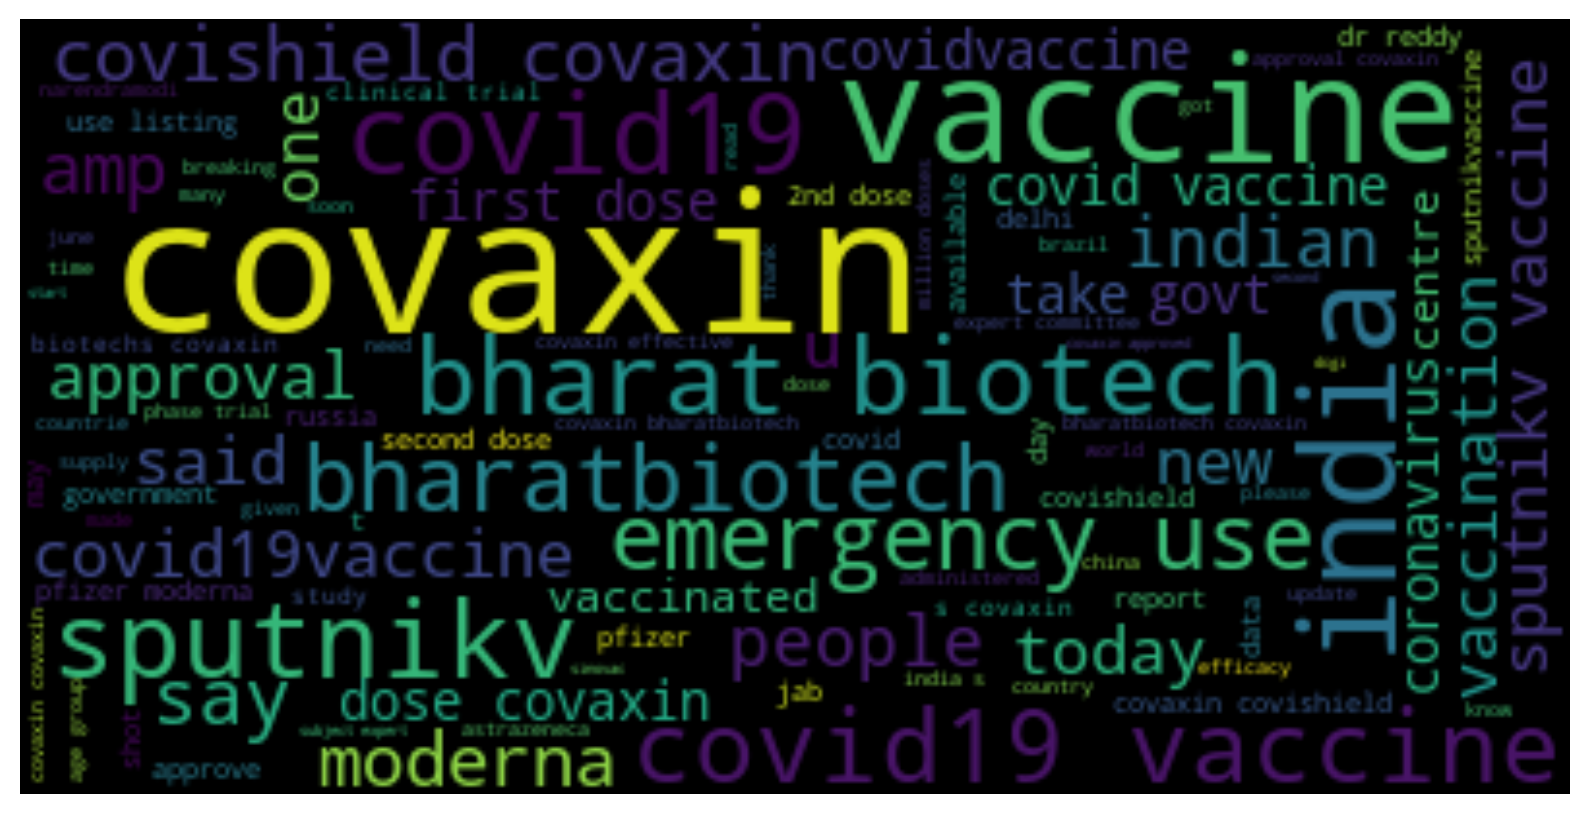

In [90]:
All_tweets = " ".join(review for review in india_df["text"])

fig, word = plt.subplots(1, 1, figsize  = (10,10))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(All_tweets)

# Display the generated image:
word.imshow(wordcloud_ALL, interpolation='bilinear')

word.axis('off')

> **Most common words in INDIA tweets**

In [91]:
USA_df = covid_df.loc[covid_df.user_location=="United States"]

(-0.5, 399.5, 199.5, -0.5)

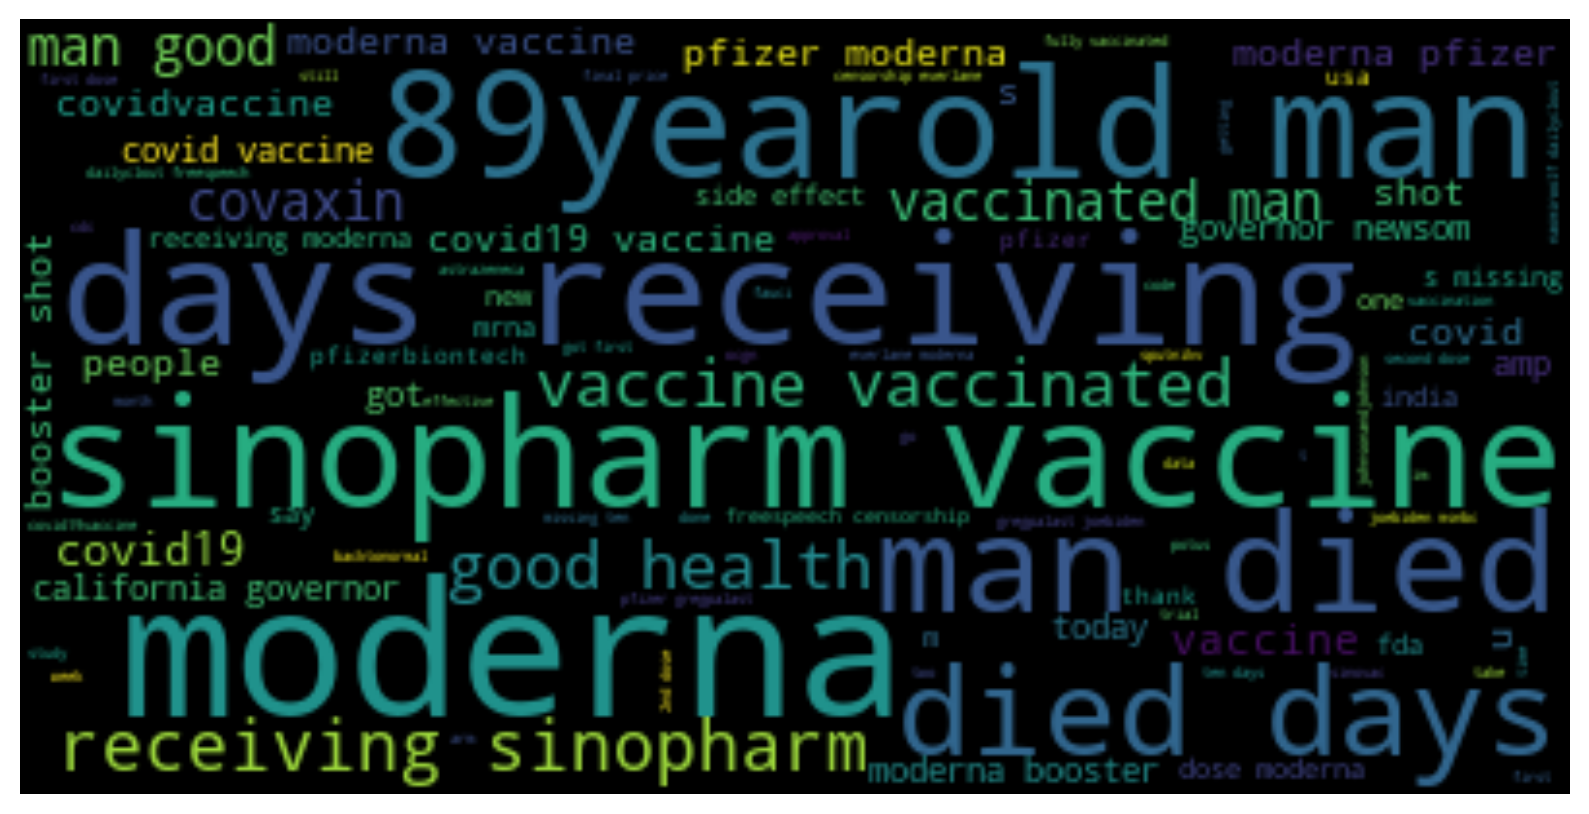

In [92]:
All_tweets = " ".join(review for review in USA_df["text"])

fig, word = plt.subplots(1, 1, figsize  = (10,10))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(All_tweets)

# Display the generated image:
word.imshow(wordcloud_ALL, interpolation='bilinear')

word.axis('off')

> **Most common words in USA tweets**

In [93]:
UK_df = covid_df.loc[covid_df.user_location=="United Kingdom"]

(-0.5, 399.5, 199.5, -0.5)

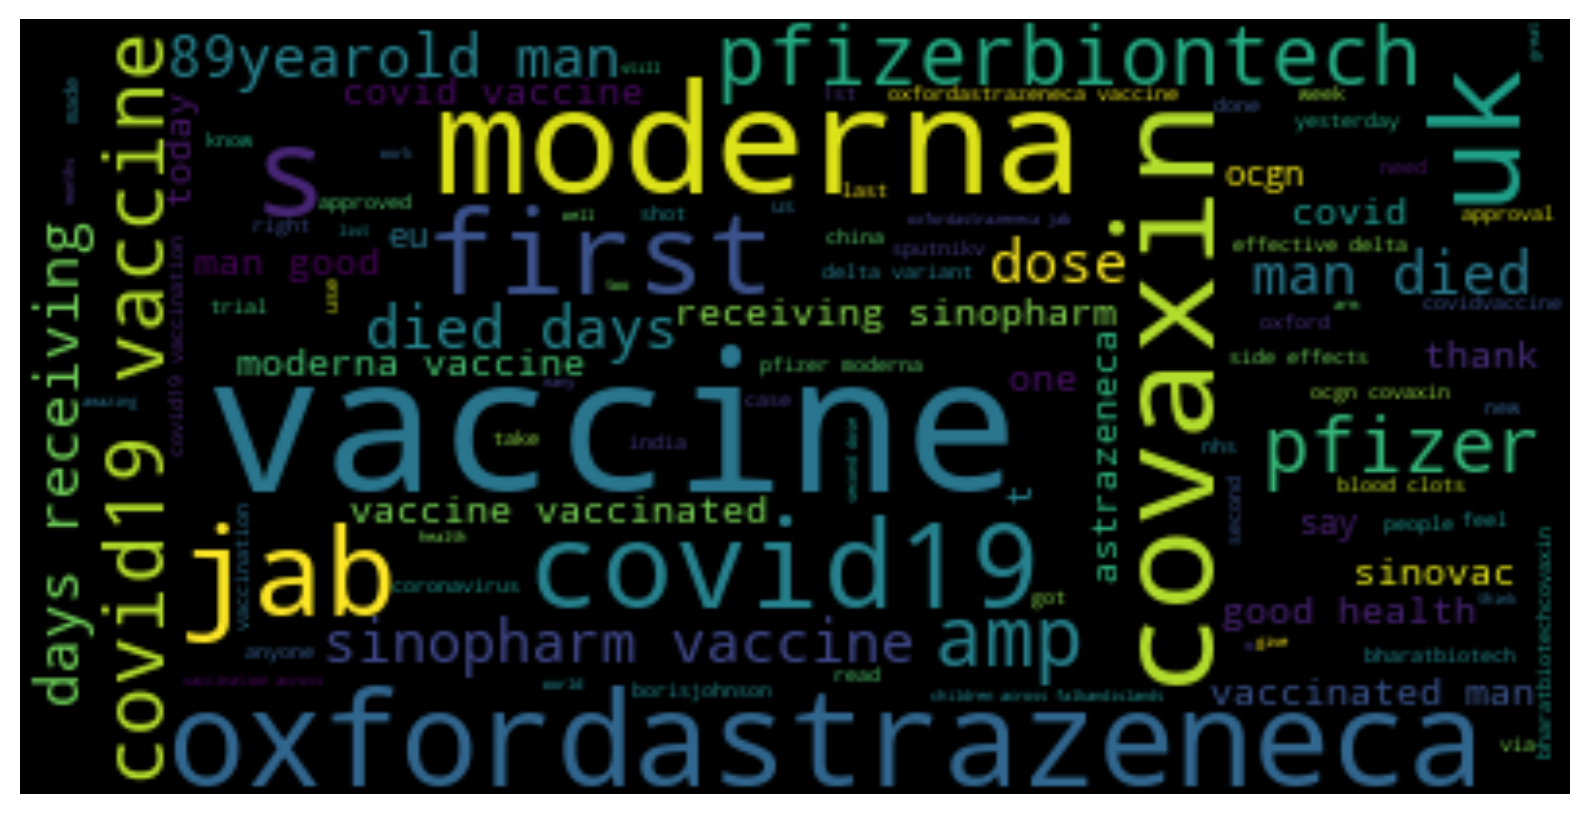

In [94]:
All_tweets = " ".join(review for review in UK_df["text"])

fig, word = plt.subplots(1, 1, figsize  = (10,10))

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(All_tweets)

# Display the generated image:
word.imshow(wordcloud_ALL, interpolation='bilinear')

word.axis('off')

> **Most common words in United Kingdom tweets**

## Applying Sentiment Analysis

> **VADER Sentiment Analysis**

VADER is a sentiment analysis tool specifically designed for analyzing sentiment or emotion in text. It's known for its ability to handle social media text, emojis, and informal language effectively. The SentimentIntensityAnalyzer class is a part of VADER and allows you to analyze the sentiment of text using a pre-trained model.



> **Polarity in NLP**

Polarity refers to the degree of positivity or negativity in a given text. In NLP, polarity analysis is used to determine the sentiment of a text, whether it is positive, negative, or neutral.

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [96]:
target = SentimentIntensityAnalyzer()
score = lambda x : target.polarity_scores(x)
sentiment_scores = covid_df.text.apply(score)
sentiment_scores

0                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1         {'neg': 0.209, 'neu': 0.608, 'pos': 0.182, 'compound': -0.1027}
2              {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.25}
3                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
4                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
                                       ...                               
228202       {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
228203       {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
228204       {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
228205         {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.6369}
228206       {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
Name: text, Length: 226373, dtype: object

In [98]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

neg    neu    pos  compound
0  0.000  1.000  0.000    0.0000
1  0.209  0.608  0.182   -0.1027
2  0.000  0.846  0.154    0.2500
3  0.000  1.000  0.000    0.0000
4  0.000  1.000  0.000    0.0000

In [99]:
adding_label = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(adding_label)
sentiment_df.head()

neg    neu    pos  compound     label
0  0.000  1.000  0.000    0.0000   neutral
1  0.209  0.608  0.182   -0.1027  negative
2  0.000  0.846  0.154    0.2500  positive
3  0.000  1.000  0.000    0.0000   neutral
4  0.000  1.000  0.000    0.0000   neutral

Now that we have the label for each tweet, we will join the label column into our main dataframe. Once we have joined the two tables, we will be counting the **number of positive, negative, and neutral tweets** from our dataframe and visualize it.

In [100]:
twitter_df = covid_df.join(sentiment_df.label)

In [101]:
twitter_df

user_location        date  \
0       La Crescenta-Montrose, CA  2020-12-20   
1               San Francisco, CA  2020-12-13   
2                        Your Bed  2020-12-12   
3          Vancouver, BC - Canada  2020-12-12   
4                   Not Mentioned  2020-12-12   
...                           ...         ...   
228202           Bengaluru, India  2021-11-15   
228203           Bengaluru, India  2021-11-15   
228204           Bengaluru, India  2021-11-15   
228205          Southern  Africa   2021-11-15   
228206           Bengaluru, India  2021-11-15   

                                                                                                       text  \
0                                          folks said daikon paste could treatcytokine storm pfizerbiontech   
1                               world wrong side history year hopefully biggest vaccination effort weve ev…   
2       coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 ...   
3                          facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…   
4                     explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…   
...                                                                                                     ...   
228202   45 urban bengaluru covidvaccine availability 1511 0230pm free slots 0 paid slots covishield dose1…   
228203     1844 bbmp bengaluru covidvaccine availability 1511 0200pm free slots covishield dose11676 dose2…   
228204  1844 urban bengaluru covidvaccine availability 1511 0200pm free slots 0 paid slots covishield dose…   
228205                                            promote vaccines leaving stronger russia vaccine sputnikv   
228206   45 urban bengaluru covidvaccine availability 1511 0130pm free slots 0 paid slots covishield dose1…   

                                                                                       clean_text_lemma  \
0                                       folk said daikon paste could treatcytokine storm pfizerbiontech   
1                            world wrong side history year hopefully biggest vaccination effort weve ev   
2       coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year   
3                            fact immutable senator even youre ethically sturdy enough acknowledge born   
4                  explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech   
...                                                                                                 ...   
228202                 urban bengaluru covidvaccine availability pm free slot paid slot covishield dose   
228203                       bbmp bengaluru covidvaccine availability pm free slot covishield dose dose   
228204                 urban bengaluru covidvaccine availability pm free slot paid slot covishield dose   
228205                                         promote vaccine leaving stronger russia vaccine sputnikv   
228206                 urban bengaluru covidvaccine availability pm free slot paid slot covishield dose   

        text_length_lemma  Number_Of_Words  \
0                       8                8   
1                      11               11   
2                      11               12   
3                      10               12   
4                       6                6   
...                   ...              ...   
228202                 11               14   
228203                 10               12   
228204                 11               14   
228205                  7                7   
228206                 11               14   

                                                                                                  tokenized  \
0                                 [folks, said, daikon, paste, could, treatcytokine, storm, pfizerbiontech]   
1                  [world, wrong, side

In [102]:
twitter_df.label.value_counts()

neutral     113267
positive     79287
negative     31988
Name: label, dtype: int64

In [103]:
twitter_df.label.isna().sum()

1831

In [104]:
twitter_df = twitter_df.dropna(axis=0)

In [105]:
twitter_df.head(3)
count = twitter_df.label.value_counts().reset_index()

user_location        date  \
0  La Crescenta-Montrose, CA  2020-12-20   
1          San Francisco, CA  2020-12-13   
2                   Your Bed  2020-12-12   

                                                                                                  text  \
0                                     folks said daikon paste could treatcytokine storm pfizerbiontech   
1                          world wrong side history year hopefully biggest vaccination effort weve ev…   
2  coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 ...   

                                                                                  clean_text_lemma  \
0                                  folk said daikon paste could treatcytokine storm pfizerbiontech   
1                       world wrong side history year hopefully biggest vaccination effort weve ev   
2  coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year   

   text_length_lemma  Number_Of_Words  \
0                  8                8   
1                 11               11   
2                 11               12   

                                                                                             tokenized  \
0                            [folks, said, daikon, paste, could, treatcytokine, storm, pfizerbiontech]   
1             [world, wrong, side, history, year, hopefully, biggest, vaccination, effort, weve, ev, ]   
2  [coronavirus, sputnikv, astrazeneca, pfizerbiontech, moderna, covid19, russian, vaccine, created...   

      label  
0   neutral  
1  negative  
2  positive

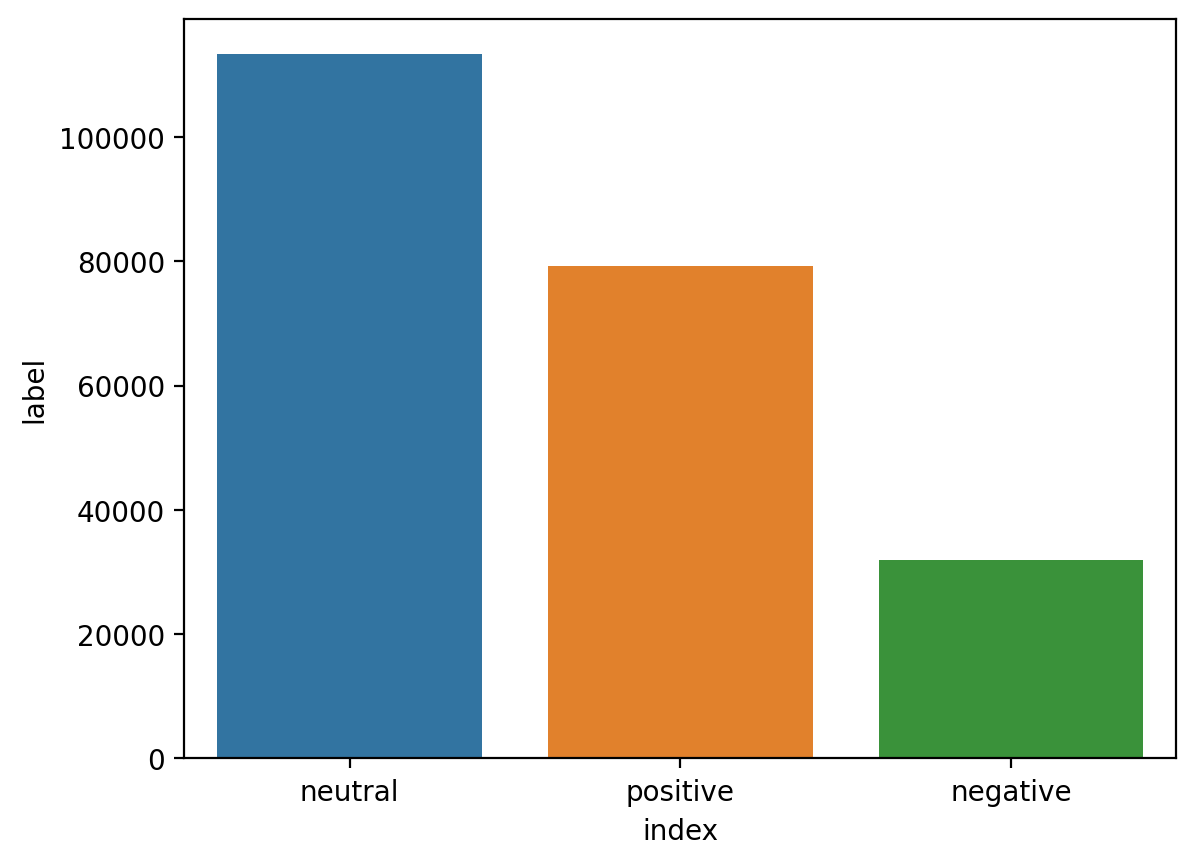

In [106]:
sns.barplot(data=count,x='index',y='label');

In [118]:
data_agg = twitter_df[['user_location','date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
data_agg.head()

date     label  counts
0  2020-12-12  negative       9
1  2020-12-12   neutral      29
2  2020-12-12  positive      25
3  2020-12-13  negative      13
4  2020-12-13   neutral      50

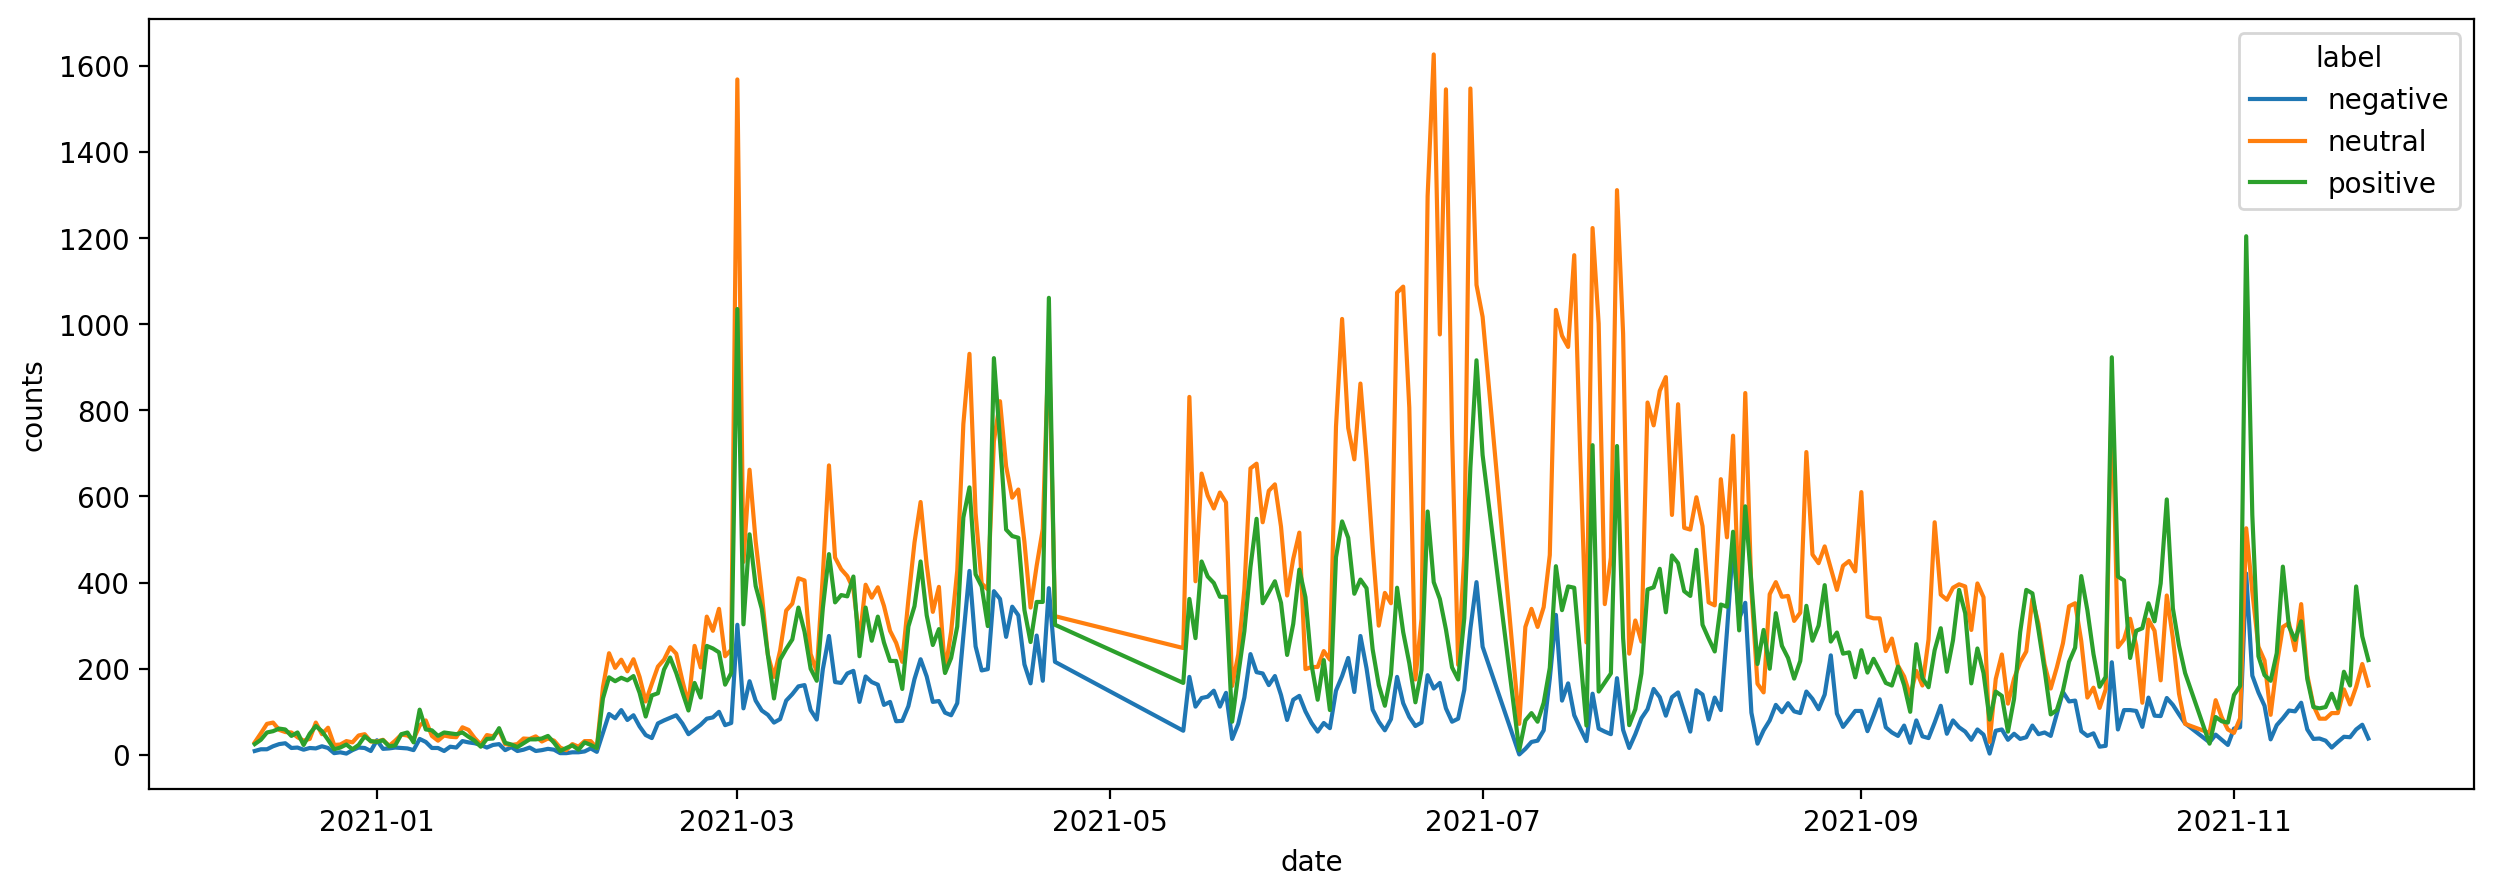

In [124]:
plt.figure(figsize=(15,5))
sns.lineplot(data = data_agg, x='date', y='counts', hue='label');

> From this line graph we can say that most tweets over the time is become Neutral thereafter Postive and Negative.

In [125]:
twitter_df

user_location        date  \
0       La Crescenta-Montrose, CA  2020-12-20   
1               San Francisco, CA  2020-12-13   
2                        Your Bed  2020-12-12   
3          Vancouver, BC - Canada  2020-12-12   
4                   Not Mentioned  2020-12-12   
...                           ...         ...   
226368           Philadelphia, PA  2021-11-20   
226369          The Aether Realms  2021-11-20   
226370             Global Citizen  2021-11-20   
226371             Global Citizen  2021-11-20   
226372             Global Citizen  2021-11-20   

                                                                                                       text  \
0                                          folks said daikon paste could treatcytokine storm pfizerbiontech   
1                               world wrong side history year hopefully biggest vaccination effort weve ev…   
2       coronavirus sputnikv astrazeneca pfizerbiontech moderna covid19 russian vaccine created last 24 ...   
3                          facts immutable senator even youre ethically sturdy enough acknowledge 1 born i…   
4                     explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech…   
...                                                                                                     ...   
226368                   want us vaxxed come haven’t pushed covaxin ocgncompany philadelphia county ocugen…   
226369                                            govcanhealth speaking health world needs covaxin vaccigen   
226370                      nihdirector ezralevant seen tweet govcanhealth delays safest vaccine adults ki…   
226371                       nihdirector gadsaad seen tweet govcanhealth delays safest vaccine adults kids…   
226372                      nihdirector rosiebarton seen tweet govcanhealth delays safest vaccine adults k…   

                                                                                       clean_text_lemma  \
0                                       folk said daikon paste could treatcytokine storm pfizerbiontech   
1                            world wrong side history year hopefully biggest vaccination effort weve ev   
2       coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year   
3                            fact immutable senator even youre ethically sturdy enough acknowledge born   
4                  explain needvaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech   
...                                                                                                 ...   
226368                         want u vaxxed come pushed covaxin ocgncompany philadelphia county ocugen   
226369                                         govcanhealth speaking health world need covaxin vaccigen   
226370                     nihdirector ezralevant seen tweet govcanhealth delay safest vaccine adult ki   
226371                       nihdirector gadsaad seen tweet govcanhealth delay safest vaccine adult kid   
226372                     nihdirector rosiebarton seen tweet govcanhealth delay safest vaccine adult k   

        text_length_lemma  Number_Of_Words  \
0                       8                8   
1                      11               11   
2                      11               12   
3                      10               12   
4                       6                6   
...                   ...              ...   
226368                 10               11   
226369                  7                7   
226370                 10               10   
226371                 10               10   
226372                 10               10   

                                                                                                  tokenized  \
0                                 [folks, said, daikon, paste, could, treatcytokine, storm, pfizerbiontech]   
1                  [world, wrong, side

In [ ]:
twitter_df.to_csv(r"C:\Data\Twitter_analysis\covid_vaccine_clean.csv")

# Model Building

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.utils import pad_sequences

In [3]:
sentiment_df = pd.read_csv(r"C:\Data\Twitter_analysis\covid_vaccine_clean.csv")

In [4]:
sentiment_df.head(2)

Unnamed: 0              user_location        date  \
0           0  La Crescenta-Montrose, CA  2020-12-20   
1           1          San Francisco, CA  2020-12-13   

                                                text  \
0  folks said daikon paste could treatcytokine st...   
1  world wrong side history year hopefully bigges...   

                                    clean_text_lemma  text_length_lemma  \
0  folk said daikon paste could treatcytokine sto...                  8   
1  world wrong side history year hopefully bigges...                 11   

   Number_Of_Words                                          tokenized  \
0                8  ['folks', 'said', 'daikon', 'paste', 'could', ...   
1               11  ['world', 'wrong', 'side', 'history', 'year', ...   

      label  
0   neutral  
1  negative

In [5]:
anaysis_df = sentiment_df[['clean_text_lemma','label']]

In [6]:
anaysis_df.columns = ['text','sentiment']

In [7]:
anaysis_df

text sentiment
0       folk said daikon paste could treatcytokine sto...   neutral
1       world wrong side history year hopefully bigges...  negative
2       coronavirus sputnikv astrazeneca pfizerbiontec...  positive
3       fact immutable senator even youre ethically st...   neutral
4       explain needvaccine borisjohnson matthancock w...   neutral
...                                                   ...       ...
224537  want u vaxxed come pushed covaxin ocgncompany ...  positive
224538  govcanhealth speaking health world need covaxi...  positive
224539  nihdirector ezralevant seen tweet govcanhealth...  positive
224540  nihdirector gadsaad seen tweet govcanhealth de...  positive
224541  nihdirector rosiebarton seen tweet govcanhealt...  positive

[224542 rows x 2 columns]

In [8]:
anaysis_df.isna().sum()

text         13
sentiment     0
dtype: int64

In [9]:
anaysis_df = anaysis_df.dropna(axis=0)

In [10]:
# Function for removing less than 1 length

def remaining(caption):
    caption_words = caption.split()
    remain_words = []
    for word in caption_words:
        if len(word)>1:
            remain_words.append(word)
    new_words = ' '.join(remain_words)
    
    return new_words

In [11]:
anaysis_df['text'] =  anaysis_df[['text']].applymap(remaining)

In [12]:
split_words = set()
for i in anaysis_df['text'].values:
    split_words.update(i.split())

In [13]:
len(split_words)

124162

In [14]:
anaysis_df['text'] =  anaysis_df[['text']].applymap(lambda x : x.split())

In [15]:
anaysis_df

text sentiment
0       [folk, said, daikon, paste, could, treatcytoki...   neutral
1       [world, wrong, side, history, year, hopefully,...  negative
2       [coronavirus, sputnikv, astrazeneca, pfizerbio...  positive
3       [fact, immutable, senator, even, youre, ethica...   neutral
4       [explain, needvaccine, borisjohnson, matthanco...   neutral
...                                                   ...       ...
224537  [want, vaxxed, come, pushed, covaxin, ocgncomp...  positive
224538  [govcanhealth, speaking, health, world, need, ...  positive
224539  [nihdirector, ezralevant, seen, tweet, govcanh...  positive
224540  [nihdirector, gadsaad, seen, tweet, govcanheal...  positive
224541  [nihdirector, rosiebarton, seen, tweet, govcan...  positive

[224529 rows x 2 columns]

> **I am dropping the 'Neutral' sentiments as my goal was to only differentiate positive and negative tweets.**

In [18]:
data = anaysis_df[anaysis_df.sentiment != "neutral"]

In [19]:
print("Positive Tweets:",data[ data['sentiment'] == 'positive'].size)
print("Negative Tweets:",data[ data['sentiment'] == 'negative'].size)

Positive Tweets: 158560
Negative Tweets: 63974


In [21]:
X = data['text']

In [22]:
X

1         [world, wrong, side, history, year, hopefully,...
2         [coronavirus, sputnikv, astrazeneca, pfizerbio...
5         [anyone, useful, adviceguidance, whether, covi...
6         [isbit, sad, claim, fame, success, vaccination...
7         [many, bright, day, best, bidenharris, winning...
                                ...                        
224537    [want, vaxxed, come, pushed, covaxin, ocgncomp...
224538    [govcanhealth, speaking, health, world, need, ...
224539    [nihdirector, ezralevant, seen, tweet, govcanh...
224540    [nihdirector, gadsaad, seen, tweet, govcanheal...
224541    [nihdirector, rosiebarton, seen, tweet, govcan...
Name: text, Length: 111267, dtype: object

In [23]:
max_words = 100000

token = Tokenizer(num_words=max_words)

In [24]:
token.fit_on_texts(X)

In [25]:
token.document_count

111267

In [26]:
# token.index_word # unique words

In [27]:
len(token.index_word)

79500

In [28]:
# token.index_docs
len(token.index_docs)

79500

In [29]:
token.fit_on_sequences(X)

In [30]:
x = token.texts_to_sequences(X)

In [31]:
x[10]

[181, 1377, 37, 31, 43, 113, 35, 82, 10, 10217]

In [32]:
X = pad_sequences(x,maxlen=300) # it will fill the remaining with zeros at ending

In [33]:
y = data['sentiment']

In [34]:
label_token = Tokenizer()

label_token.fit_on_texts(y)

y = np.array(label_token.texts_to_sequences(y))


In [35]:
train_labels = to_categorical(y,dtype = 'uint8')

In [36]:
train_labels.shape

(111267, 3)

In [37]:
len(X[10])

300

# LSTM

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [39]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Flatten,Embedding,LSTM,GRU,Bidirectional
from keras.layers import Dropout,GlobalMaxPooling1D,SpatialDropout1D

Next, I compose the LSTM Network. Note that embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and softmax is just the right activation method for that.

In [40]:
model = Sequential()

model.add(Embedding(input_dim = max_words , output_dim = 128, input_length = 300))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(183, dropout = 0.3, recurrent_dropout = 0.3))
model.add(Dense(183, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          12800000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 183)               228384    
                                                                 
 dense (Dense)               (None, 183)               33672     
                                                                 
 dropout (Dropout)           (None, 183)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 184       
                                                        

In [ ]:
history = model.fit(X_train,y_train,batch_size=666,epochs=18,validation_split=0.2)

Epoch 1/18
107/107 [==============================] - 4807s 45s/step - loss: 0.0000e+00 - accuracy: 0.7123 - val_loss: 0.0000e+00 - val_accuracy: 0.7094
Epoch 2/18
107/107 [==============================] - 8566s 81s/step - loss: 0.0000e+00 - accuracy: 0.7123 - val_loss: 0.0000e+00 - val_accuracy: 0.7094
Epoch 3/18
107/107 [==============================] - 9414s 88s/step - loss: 0.0000e+00 - accuracy: 0.7123 - val_loss: 0.0000e+00 - val_accuracy: 0.7094
Epoch 4/18
 73/107 [===================>..........] - ETA: 1:10:28 - loss: 0.0000e+00 - accuracy: 0.7094

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score,accuracy = model.evaluate(X_test, y_test, verbose = 2, batch_size = 666)

In [ ]:
example = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
example = tokenizer.texts_to_sequences(example)
#padding the tweet to have exactly the same shape as `embedding_2` input
example = pad_sequences(example, maxlen=28, dtype='int32', value=0)
print(example)

In [ ]:
sentiment = model.predict(example,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")